### Hypothesis and cost function

### TensorFlow Mechanics
1. Build graph using TF operations
2. Run graph and get results
3. Update graph and get results

### Ex1. Variable 사용
- x, y 값이 주어졌을 때, W, b 값을 예측하기 

1. 그래프 빌드
2. 세션을 통해 그래프를 실행
3. 실행결과가 그래프를 업데이트

In [ ]:
# pip install tqdm

In [1]:
from tqdm import tqdm_notebook
import tensorflow as tf

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# TF 변수 선언 (1차원 랜던숫자)
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) #기울기를 변화시킨다(포물선 2차 함수 미분)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

C:\Python\Anaconda3-52\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Fit the line
for step in tqdm_notebook(range(2001)):
    sess.run(train)
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val},  \t W={W_val},  \t b={b_val}".format(
            step=step, 
            cost_val=sess.run(cost), 
            W_val=sess.run(W), 
            b_val=sess.run(b)
        ));

step=0, 	 cost=21.80513572692871,  	 W=[-1.6065874],  	 b=[1.0567815]
step=1, 	 cost=17.335908889770508,  	 W=[-1.4055772],  	 b=[1.1399094]
step=2, 	 cost=13.80273723602295,  	 W=[-1.226653],  	 b=[1.2133343]
step=3, 	 cost=11.009479522705078,  	 W=[-1.0673654],  	 b=[1.2781337]
step=4, 	 cost=8.801081657409668,  	 W=[-0.92553663],  	 b=[1.3352656]
step=200, 	 cost=0.18670348823070526,  	 W=[0.49815208],  	 b=[1.1408182]
step=400, 	 cost=0.07129253447055817,  	 W=[0.6898885],  	 b=[0.7049565]
step=600, 	 cost=0.027222955599427223,  	 W=[0.80836993],  	 b=[0.43562022]
step=800, 	 cost=0.010395086370408535,  	 W=[0.8815841],  	 b=[0.26918703]
step=1000, 	 cost=0.003969341516494751,  	 W=[0.92682624],  	 b=[0.16634111]
step=1200, 	 cost=0.0015156815061345696,  	 W=[0.9547832],  	 b=[0.1027885]
step=1400, 	 cost=0.0005787624977529049,  	 W=[0.9720588],  	 b=[0.06351705]
step=1600, 	 cost=0.00022100012574810535,  	 W=[0.98273396],  	 b=[0.03924978]
step=1800, 	 cost=8.438871009275317e-05, 

### Ex2. Plaeholder 사용
- 데이터의 형태만 지정하고 실제 데이터는 실행단계에서 입력받는 방법 

- 그래프 빌드
- 세션을 통해 그래프를 실행
- 실행결과가 그래프를 업데이트

In [3]:
import tensorflow as tf

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

In [7]:
# Fit the line
steps     = []
cost_vals = []
W_vals    = []
b_vals    = []
for step in tqdm_notebook(range(2001)):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                         feed_dict={X: [1, 2, 3], 
                                                    Y: [5, 6, 7]})
    steps.append(step)
    cost_vals.append(cost_val)
    W_vals.append(W_val)
    b_vals.append(b_val)
    # W_vals.append(float(W_val))
    # b_vals.append(float(b_val))
    
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val}, \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));

step=0, 	 cost=1.6553525924682617, 	 W=[0.06787792], 	 b=[4.9869366]
step=1, 	 cost=1.3489028215408325, 	 W=[0.11539851], 	 b=[5.0044827]
step=2, 	 cost=1.1064767837524414, 	 W=[0.15778202], 	 b=[5.0197773]
step=3, 	 cost=0.9146583080291748, 	 W=[0.19559793], 	 b=[5.0330706]
step=4, 	 cost=0.7628442645072937, 	 W=[0.22935264], 	 b=[5.044585]
step=200, 	 cost=0.07540981471538544, 	 W=[0.68182606], 	 b=[4.7232842]
step=400, 	 cost=0.028795018792152405, 	 W=[0.803388], 	 b=[4.4469447]
step=600, 	 cost=0.010995312593877316, 	 W=[0.8785062], 	 b=[4.276184]
step=800, 	 cost=0.0041985115967690945, 	 W=[0.92492443], 	 b=[4.1706643]
step=1000, 	 cost=0.0016031988197937608, 	 W=[0.9536078], 	 b=[4.10546]
step=1200, 	 cost=0.0006121870246715844, 	 W=[0.9713323], 	 b=[4.0651684]
step=1400, 	 cost=0.0002337619662284851, 	 W=[0.9822853], 	 b=[4.04027]
step=1600, 	 cost=8.926251757657155e-05, 	 W=[0.98905325], 	 b=[4.024884]
step=1800, 	 cost=3.4086380765074864e-05, 	 W=[0.9932355], 	 b=[4.015377]
st

### Ex3. Plaeholder 사용
- exptected : W=1, b=1.1

- X: [1.0, 2.0, 3.0, 4.0, 5.0]
- Y: [2.1, 3.1, 4.1, 5.1, 6.1]

In [8]:
# Fit the line
# for step in notebook_tqdm(range(2001)):
for step in range(2001):

    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
        feed_dict={X: [1.0, 2.0, 3.0, 4.0, 5.0], 
                   Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 100 == 0 or step < 10:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val},  \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));
        

step=0, 	 cost=8.392427444458008, 	 W=[0.8221695],  	 b=[3.9515631]
step=1, 	 cost=5.436703681945801, 	 W=[0.6901984],  	 b=[3.9052017]
step=2, 	 cost=3.7105681896209717, 	 W=[0.59004265],  	 b=[3.8676858]
step=3, 	 cost=2.7010011672973633, 	 W=[0.51417214],  	 b=[3.8369296]
step=4, 	 cost=2.109039783477783, 	 W=[0.4568385],  	 b=[3.8113406]
step=5, 	 cost=1.7604615688323975, 	 W=[0.41365358],  	 b=[3.7897034]
step=6, 	 cost=1.5537399053573608, 	 W=[0.38126758],  	 b=[3.77109]
step=7, 	 cost=1.4297099113464355, 	 W=[0.35712332],  	 b=[3.7547922]
step=8, 	 cost=1.3538925647735596, 	 W=[0.33926862],  	 b=[3.740269]
step=9, 	 cost=1.3061943054199219, 	 W=[0.3262134],  	 b=[3.7271075]
step=100, 	 cost=0.6756569147109985, 	 W=[0.46814856],  	 b=[3.0201523]
step=200, 	 cost=0.3432117700576782, 	 W=[0.6209397],  	 b=[2.4685278]
step=300, 	 cost=0.17434005439281464, 	 W=[0.729837],  	 b=[2.0753741]
step=400, 	 cost=0.08855924010276794, 	 W=[0.80744976],  	 b=[1.7951674]
step=500, 	 cost=0.0449

### Ex4. Linear Regression

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

number_of_points = 200
x_point = []
y_point = []

w = 0.25
b = 0.75

for i in range(number_of_points):
    x = np.random.normal(0.0, 0.5)
    y = w*x + b +np.random.normal(0.0, 0.1)
    x_point.append([x])
    y_point.append([y])

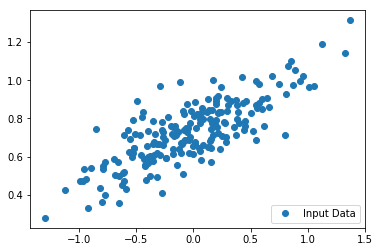

In [11]:
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend(loc=4)
plt.show()

In [12]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = W * x_point + B

# Computes the mean of elements across dimensions of a tensor
cost_function = tf.reduce_mean(tf.square(y - y_point))

# Optimizer that implements the gradient descent algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

# Add operations to minimize cost_function
train = optimizer.minimize(cost_function)

# Returns an Op that initializes global variables
# model = tf.initialize_all_variables()
model = tf.global_variables_initializer()


 y = [-0.10087588] x + [0.7230003] 


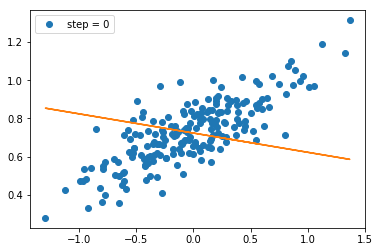


 y = [-0.01259272] x + [0.7257737] 


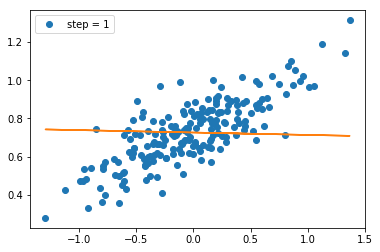


 y = [0.05486922] x + [0.7286663] 


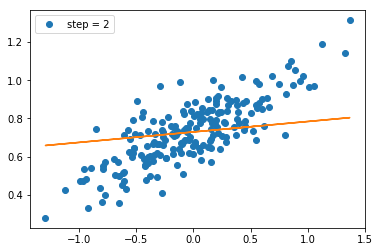


 y = [0.10644586] x + [0.73087674] 


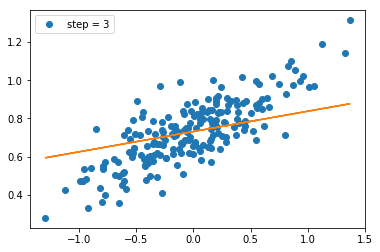


 y = [0.14587769] x + [0.73256665] 


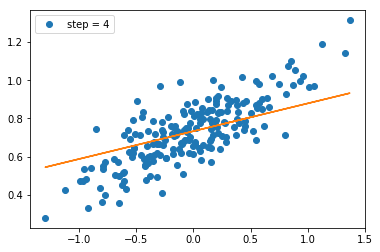


 y = [0.2739051] x + [0.73805356] 


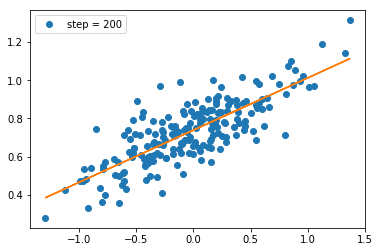


 y = [0.2739051] x + [0.73805356] 


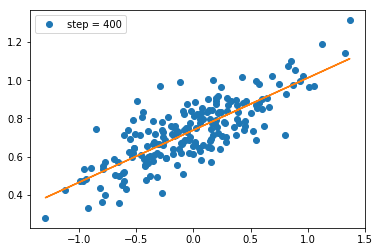


 y = [0.2739051] x + [0.73805356] 


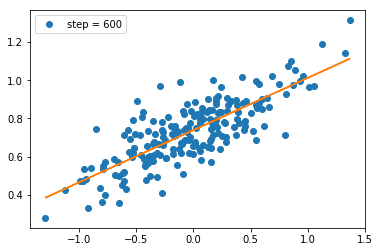


 y = [0.2739051] x + [0.73805356] 


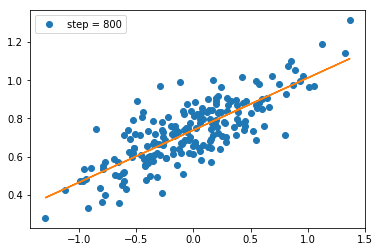


 y = [0.2739051] x + [0.73805356] 


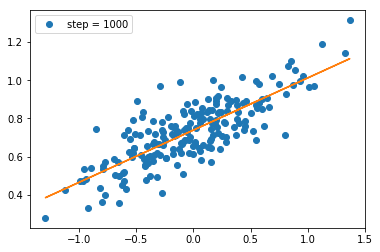


 y = [0.2739051] x + [0.73805356] 


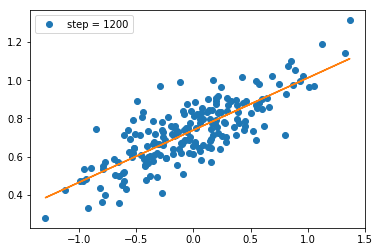


 y = [0.2739051] x + [0.73805356] 


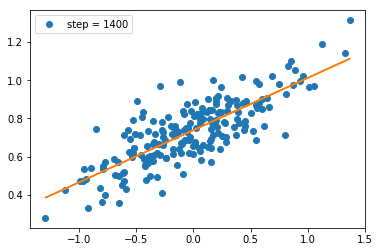


 y = [0.2739051] x + [0.73805356] 


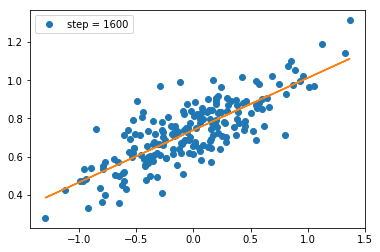


 y = [0.2739051] x + [0.73805356] 


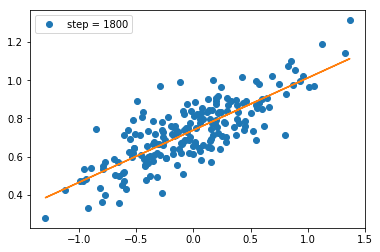


 y = [0.2739051] x + [0.73805356] 


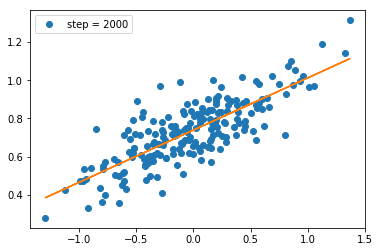

In [13]:
with tf.Session() as sess:
    sess.run(model)
    for step in range(0,2001):
        sess.run(train)
        if (step % 200) == 0 or step<5:
            print("\n y = {w} x + {b} ".format(w=sess.run(W), b=sess.run(B)))
            plt.plot(x_point,y_point,'o',label='step = {}'.format(step))
            plt.plot(x_point,sess.run(W)*x_point+sess.run(B))
            plt.legend(loc=2)
            plt.show()